---

# Deutsch Algorithm

# Introduction
The Deutsch Algorithm also known as Deutsch-Jozsa Algorithm describes a solution to a class of problem that can be solved more efficiently by means of quantum computation.
It demonstrates a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm for a specifically designed problem.
The problem in question which will be referred to as the `Deutsch-Jozsa problem` in this text, is a black-box problem which can be solved efficiently by a quantum computer
with no error. Before delving further into the algorithm, the next section talks about the formulation of the problem.

### Deutsch-Jozsa Problem

The Deutsch-Jozsa Problem can be stated as follows, given a function $f$ operating over a string $x$ of finite length $N$ where $x, N, f(x) \in \sum = \{0, 1\}$ 
ie. $f: \{0, 1\} ^N \to \{0, 1\}$, determine if the input is constant or balanced. Constant in this context is when all the input are either $0$ s or $1$ s and balanced is 
when the count of $$ s and $1$ s are equal. The problem is such that for any given input the string is EITHER constant or balanced. 
 $$ f(x) = \begin{cases}
    0 & \text{if } x \text { is constant} \\
    1 & \text{if } x \text { is balanced} 
  \end{cases}
$$

Modeling a solution to this class of problem using a classical deterministic algorithm will have the following best and worst case sceneiros given a string of length N:
  - Best Case Sceneiro
    - If the first two alphabets of string $x$ is exclusive, then one can conclusively say that the string $x$ is balanced.
  - Worst Case Sceneiro
    - This will be the case when  
    If the first $\frac{\lvert x \rvert}{2} = \frac{N}{2}$ alphabets of the string is constant, then it will take $\frac{\lvert x \rvert}{2} + 1$ number of iterations to 
    conclusively evaluate $f(x)$. 





{bibliography}

See :cite:t:`perez2011python` for an introduction to non-standard analysis.
Non-standard analysis is fun \cite{1987:nelson}

.. bibliography::

Here is my nifty citation {cite}`perez2011python`.

```{bibliography}
```

# References

(<a id="cit-perez2011python" href="#call-perez2011python">Perez, Granger <em>et al.</em>, 2011</a>) Perez Fernando, Granger Brian E and Hunter John D, ``_Python: an ecosystem for scientific computing_'', Computing in Science \\& Engineering, vol. 13, number 2, pp. 13--21,  2011.

(<a id="cit-1987:nelson" href="#call-1987:nelson">?</a>) !! _This reference was not found in biblio.bib _ !!



```\References
```

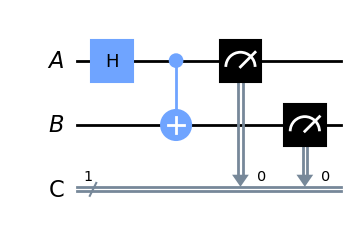

In [15]:
import qiskit as QS

A = QS.QuantumRegister(1, "A")
B = QS.QuantumRegister(1, "B")
C = QS.ClassicalRegister(1, "C")
# D = QS.ClassicalRegister(1, "D")

circuit = QS.QuantumCircuit(A, B, C)
circuit.h(A)
circuit.cx(A, B)
circuit.measure(A, C)
circuit.measure(B, C)
display(circuit.draw(output='mpl'))

***
### End